# Model Prediction

In [2]:
# ======================================================
# train_and_evaluate_pipeline.py
# ======================================================
import os
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from modeling.data_load import load_data
from modeling.train_stacked_model import build_model, train_and_evaluate
from modeling.evaluation_utils import (
    ranked_precision_at_cutoffs,
    ranked_precision_by_bins,
    plot_cumulative_precision,
    plot_bin_precision,
    save_predictions_csv,
)


# ------------------ Load & Prepare ------------------
X, y, target_col, ids = load_data()

# ------------------ Build & Train ------------------
model = build_model(y)
model, X_test, y_test, y_pred, y_proba = train_and_evaluate(model, X, y)

=== Loading datasets ===
first_advances: 16691 rows
labels: 54616 rows
transactions_all: 19986364 rows, 40047 users
spending_pct: 39958 rows
flow_metrics: 4062 rows
diversity_features: 16691 rows
ID intersection (request_id ↔ advance_id): 15599
Joined labels: 15599 rows

Final feature matrix: (15599, 40), target: (15599,)


[14:14:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:14:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:14:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:14:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:14:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:15:27] WARNING: /Users/runner/minifo


Cross-Validation Metrics (mean ± std):
  Precision: 0.819 ± 0.018
  AUROC:     0.635 ± 0.009


[14:18:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:18:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:18:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:18:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[14:18:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




Holdout Evaluation:
  Precision: 0.835
  AUROC:     0.633

Detailed Classification Report:
              precision    recall  f1-score   support

           0      0.305     0.777     0.438       800
           1      0.835     0.390     0.531      2320

    accuracy                          0.489      3120
   macro avg      0.570     0.584     0.485      3120
weighted avg      0.700     0.489     0.508      3120


Meta-learner Coefficients:
  rf    : +2.117
  xgb   : +0.133
  lgbm  : +0.325
  svc   : +3.824


,cutoff_pct,k,precision
0,5,156,0.916667
1,10,312,0.897436
2,20,624,0.889423
3,30,936,0.855769
4,50,1560,0.810256


,bin_lo,bin_hi,n,precision
0,0.0,0.1,0,NaN
1,0.1,0.2,32,0.531250
2,0.2,0.3,159,0.509434
3,0.3,0.4,221,0.588235
4,0.4,0.5,1626,0.730627
5,0.5,0.6,361,0.742382
6,0.6,0.7,424,0.863208
7,0.7,0.8,285,0.908772
8,0.8,0.9,12,0.916667
9,0.9,1.0,0,NaN


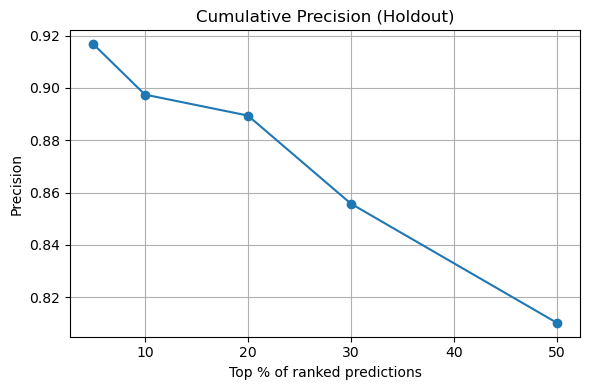

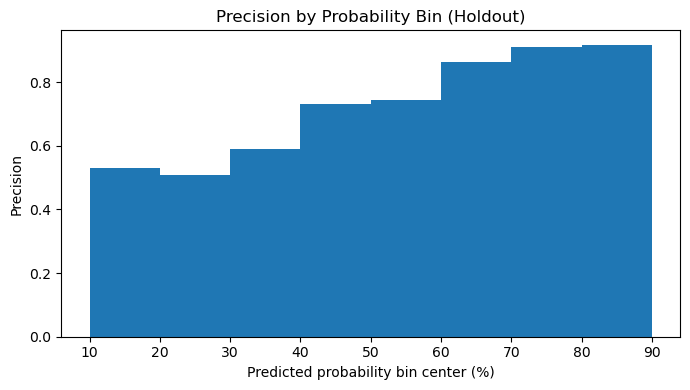

Saved 3,122 rows to model_predictions_holdout.csv


0               b'?9(\xa7y\xaeE\xee\x8c\xf0\xdf\xe95\xff\xe9\xb7'
1               b'jz4_\x91\x8aJ\x91\x82\xbdg\x12\x97\xe1\x06\xa0'
2               b'\xfe\xaf\x04\xfc\xe9\xd3D\x93\x9a\x89\xda\xf...
3               b'\x02\x8e\x81\xe0\x1d>A\xc4\x9e\x7f\x1a9\x96 <2'
4                  b'mK2)\xb3|J\xb6\xb6\xca\xd7.\xd5\xd9\xae\xce'
                                      ...                        
3117            b'J\x85\xa3\xc7\xbd\x16B\xd6\x88\xbd\xa10\xdb\...
3118            b'*\xbe\xde\xba\x1e\\J\x07\xaf\xc5\xa0\x1e\xd1...
3119            b'\t\x83\xbb:\xaa\nO\xd1\x86e\xb8\xe6\x1f\x8eJ...
y_pred          [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, ...
y_pred_proba    [0.48912984005996707, 0.6350646392722721, 0.49...
Length: 3122, dtype: object

In [5]:
# ------------------ Ranked Precision Metrics ------------------
curve = ranked_precision_at_cutoffs(
    y_test,
    y_proba,
    (0.05, 0.1, 0.2, 0.3, 0.5)
)
display(curve)

bins = ranked_precision_by_bins(
    y_test,
    y_proba
)
display(bins)

# ------------------ Plots ------------------
plot_cumulative_precision(curve, title="Cumulative Precision (Holdout)")
plot_bin_precision(bins, title="Precision by Probability Bin (Holdout)")

# ------------------ Export Predictions CSV ------------------
# Match IDs to test set using consistent split indices
idx = np.arange(len(X))
_, idx_test = train_test_split(idx, test_size=0.2, stratify=y, random_state=42)
ids_test = pd.Series(ids).iloc[idx_test].reset_index(drop=True)

save_predictions_csv(
    model=model,
    X=X_test,
    ids_df=ids_test,
    y_true=y_test,
    path="model_predictions_holdout.csv",
)


In [6]:
# ======================================================
# Feature Importance Analysis
# ======================================================

from modeling.feature_importance import main as run_feature_importance

importance_results = run_feature_importance()

importance_results


=== Loading datasets ===
first_advances: 16691 rows
labels: 54616 rows
transactions_all: 19986364 rows, 40047 users
spending_pct: 39958 rows
flow_metrics: 4062 rows
diversity_features: 16691 rows
ID intersection (request_id ↔ advance_id): 15599
Joined labels: 15599 rows

Final feature matrix: (15599, 40), target: (15599,)

=== Evaluating rf ===
Native importances found for rf.
[Saved] feature_importance_rf_native.csv

=== Evaluating xgb ===
Native importances found for xgb.
[Saved] feature_importance_xgb_native.csv

=== Evaluating lgbm ===
Native importances found for lgbm.
[Saved] feature_importance_lgbm_native.csv

=== Evaluating svc ===
No native importances for svc. Using permutation importance.
[Saved] feature_importance_svc_perm.csv

Done. Feature importance files saved.


{'rf':                            feature  importance
 15                  total_spending    0.110210
 12                    TRANSFER_OUT    0.091729
 7                    LOAN_PAYMENTS    0.087795
 4                 GENERAL_SERVICES    0.081262
 1                    ENTERTAINMENT    0.068714
 2                   FOOD_AND_DRINK    0.068506
 3              GENERAL_MERCHANDISE    0.066565
 0                        BANK_FEES    0.062711
 13                  TRANSPORTATION    0.062504
 11              RENT_AND_UTILITIES    0.056738
 10                   PERSONAL_CARE    0.054372
 8                          MEDICAL    0.049525
 5        GOVERNMENT_AND_NON_PROFIT    0.035447
 6                 HOME_IMPROVEMENT    0.033333
 14                          TRAVEL    0.032202
 36               total_transfer_in    0.005771
 38            outflow_inflow_ratio    0.005710
 39                income_spent_pct    0.005687
 37                   total_outflow    0.005674
 34                    total_inflo

In [12]:
import importlib
import modeling.feature_importance_meta
importlib.reload(modeling.feature_importance_meta)

from modeling.feature_importance_meta import compute_meta_importance

combined_importance, per_model_importance, meta_weights = compute_meta_importance()

combined_importance.head(25)


=== Loading datasets ===
first_advances: 16691 rows
labels: 54616 rows
transactions_all: 19986364 rows, 40047 users
spending_pct: 39958 rows
flow_metrics: 4062 rows
diversity_features: 16691 rows
ID intersection (request_id ↔ advance_id): 15599
Joined labels: 15599 rows

Final feature matrix: (15599, 40), target: (15599,)


[13:44:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[13:44:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[13:44:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[13:44:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

[13:44:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




===== Meta Learner Coefficients =====
rf: 1.9298
xgb: 0.1491
lgbm: 0.5815
svc: 4.3821

===== Computing Base Model Importances =====
Skipping 'rf' for feature importance as requested.
Computing importance for: xgb
Computing importance for: lgbm
Computing importance for: svc

[Saved] feature_importance_meta_weighted.csv
[Saved] meta_feature_importance.png


GENERAL_SERVICES               703.686785
ENTERTAINMENT                  648.380625
GENERAL_MERCHANDISE            647.212981
total_spending                 629.468262
FOOD_AND_DRINK                 619.345805
BANK_FEES                      600.091208
TRANSPORTATION                 595.452348
LOAN_PAYMENTS                  590.968602
PERSONAL_CARE                  587.313438
TRANSFER_OUT                   579.950041
RENT_AND_UTILITIES             562.895045
MEDICAL                        509.980821
TRAVEL                         350.067559
HOME_IMPROVEMENT               318.089379
GOVERNMENT_AND_NON_PROFIT      307.627474
total_transfer_in               98.855743
outflow_inflow_ratio            79.707738
total_income                    72.122769
income_spent_pct                63.998558
OTHER                           63.986310
total_inflow                    54.086745
total_outflow                   40.141879
total_transactions_all_time      0.000000
transaction_count_60d            0